In [1]:
# ========== Library import ==========
import numpy as np
import random
import matplotlib.pyplot as plt
import inspect

# ========== Parameter Matrix generation ==========
N = 5  # Maximum number of the possible peak
Data_size = 300000

# Set of Parameters ready
Parameters = np.zeros((Data_size, N, 3)) 
print(Parameters.shape)

(300000, 5, 3)


In [2]:
def Lorentzian(x, *args):
    '''returns sum of Multi-Lorentzian functions
    corresponding to each three parameters:
    amplitude, center, width'''

    # in physics
    amplitude = args[::3]
    center = args[1::3]
    width = args[2::3]

    result = 0
    for i in range(len(center)):
        result += amplitude[i] * ( width[i]**2 / ((x-center[i])**2 + width[i]**2))

    return result  


In [3]:
# ========== x-domain range ==========
x = np.arange(-2, 7, 0.01)
print(len(x))

900


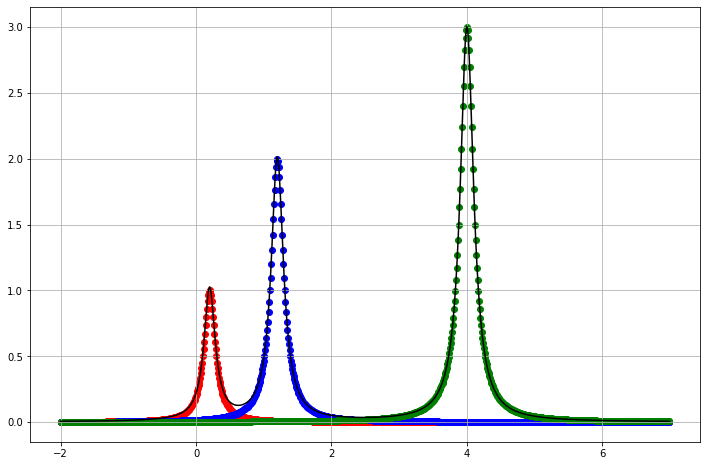

In [4]:
# ========== Checking out of the Lorentzian function ==========
params = [1, 0.2, 0.1, 2, 1.2, 0.11, 3, 4, 0.12]

plt.figure(figsize = (12, 8))
plt.plot(x, Lorentzian(x, *params), color = 'black')

plt.scatter(x, Lorentzian(x, *params[:3]), color = 'red')
plt.scatter(x, Lorentzian(x, *params[3:6]), color = 'blue')
plt.scatter(x, Lorentzian(x, *params[6:]), color = 'green')
plt.grid(True)
plt.show()

### Parameter Matrix(amplitude, center, width) generation

In [5]:
# ========== Generation of Lorentzian Parameters with Matrix Form ==========

for i in range(len(Parameters)): # For each matrix in Parameter set..
    for j in range(Parameters.shape[1]): # For each row in each matrix..
        
        # append three arguments that will be used in Lorentzian function
        # amplitude = 1 ~ 5 사이의 실수
        # center    = 0 ~ 10 사이의 실수
        # width     = 0.1 ~ 0.4 사이의 실수

        a = 1 + 0.5 * np.random.rand() - 0.25
        b = 2 + 0.5 * np.random.rand() - 0.25
        c = 3 + 0.5 * np.random.rand() - 0.25
        d = 4 + 0.5 * np.random.rand() - 0.25
        e = 5 + 0.5 * np.random.rand() - 0.25

        Parameters[i][0] = np.array([[1 + 4* np.random.rand(), a, 0.3*np.random.rand() + 0.1 ]])
        Parameters[i][1] = np.array([[1 + 4* np.random.rand(), b, 0.3*np.random.rand() + 0.1 ]])
        Parameters[i][2] = np.array([[1 + 4* np.random.rand(), c, 0.3*np.random.rand() + 0.1 ]])
        Parameters[i][3] = np.array([[1 + 4* np.random.rand(), d, 0.3*np.random.rand() + 0.1 ]])
        Parameters[i][4] = np.array([[1 + 4* np.random.rand(), e, 0.3*np.random.rand() + 0.1 ]])

        
# Check out
print(Parameters)

[[[1.67823017 0.91607359 0.23170822]
  [2.74896874 1.89974815 0.17275819]
  [4.73524854 2.75821146 0.39316098]
  [1.55763455 4.10008479 0.1575395 ]
  [4.99025022 4.77518474 0.37806592]]

 [[4.19427292 1.08780019 0.15592146]
  [2.8965646  2.10077535 0.31623651]
  [1.09507771 3.18164808 0.19867296]
  [3.44446528 3.87700151 0.20310152]
  [3.52846355 4.95481916 0.38048339]]

 [[4.99386127 0.9393293  0.22102922]
  [4.28682483 2.02370797 0.14065568]
  [4.5279769  2.756837   0.10442379]
  [4.46743972 3.76323572 0.33079053]
  [1.76451761 5.06592309 0.19622388]]

 ...

 [[4.80934536 1.13481941 0.183334  ]
  [1.10219628 2.23645774 0.25098429]
  [1.72517317 2.98499734 0.2562508 ]
  [4.86417646 4.0925726  0.36776004]
  [4.53836057 4.90644866 0.34696608]]

 [[3.15841844 1.11142612 0.18938272]
  [3.78846455 2.08668655 0.31393897]
  [1.08724412 3.18875342 0.35356299]
  [2.71452356 3.91059197 0.27904084]
  [3.51587238 4.82209066 0.2833404 ]]

 [[1.93868736 0.82675981 0.28842481]
  [2.91917584 2.084299

### Dataset Generation

In [6]:
# ========== Data Generation ==========
GRAPH = []  # y-value of the lorentzian
AREA = []   # area
NUM_PEAK = [] # number of peak
AMPLITUDE = [] # amplitude
CENTER = [] # center
WIDTH = [] # width

for j in Parameters:

    peak = random.randint(1, N) # Random selection of Possible peak number
    j = list(j.reshape((3*N, ))) # reshape to put it as *args

    if peak == 1:
        GRAPH.append(Lorentzian(x, *j[0:3*peak]))
        AREA.append(sum(Lorentzian(x, *j[0:3*peak])))
        NUM_PEAK.append(peak)
        AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[-1]))
        CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[-1]))
        WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[-1]))

    elif peak == 2:
        GRAPH.append(Lorentzian(x, *j[0:3*peak]))
        AREA.append(sum(Lorentzian(x, *j[0:3*peak])))
        NUM_PEAK.append(peak)
        AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[-1]))
        CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[-1]))
        WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[-1]))

    elif peak == 3:
        GRAPH.append(Lorentzian(x, *j[0:3*peak]))
        AREA.append(sum(Lorentzian(x, *j[0:3*peak])))
        NUM_PEAK.append(peak)
        AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[-1]))
        CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[-1]))
        WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[-1]))

    elif peak == 4:
        GRAPH.append(Lorentzian(x, *j[0:3*peak]))
        AREA.append(sum(Lorentzian(x, *j[0:3*peak])))
        NUM_PEAK.append(peak)
        AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[-1]))
        CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[-1]))
        WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[-1]))

    elif peak == 5:
        GRAPH.append(Lorentzian(x, *j[0:3*peak]))
        AREA.append(sum(Lorentzian(x, *j[0:3*peak])))
        NUM_PEAK.append(peak)
        AMPLITUDE.append(np.array( j[0:3*peak][::3] + (N - peak)*[-1]))
        CENTER.append(np.array(j[0:3*peak][1::3] + (N - peak)*[-1]))
        WIDTH.append(np.array(j[0:3*peak][2::3] + (N - peak)*[-1]))



In [7]:
# ========== Conversion to numpy array
GRAPH = np.array(GRAPH)
AREA = np.array(AREA)
NUM_PEAK = np.array(NUM_PEAK)

AMPLITUDE = np.array(AMPLITUDE)
CENTER = np.array(CENTER)
WIDTH = np.array(WIDTH)

# shape check
print(GRAPH.shape)
print(AREA.shape)
print(NUM_PEAK.shape)

print(AMPLITUDE.shape)
print(CENTER.shape)
print(WIDTH.shape)

(300000, 900)
(300000,)
(300000,)
(300000, 5)
(300000, 5)
(300000, 5)


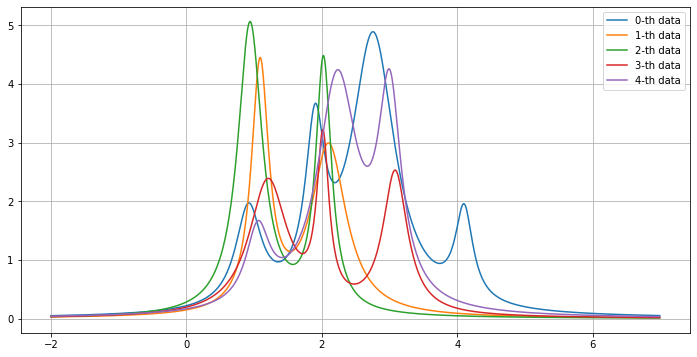

In [8]:
# ========== Generated Data sample check ==========
plt.figure(figsize = (12, 6))
for i in range(5):
    plt.plot(x, GRAPH[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid(True)
    

In [9]:
# ========== Data spliting up into three group ==========
# ========== Training / Validation / Test ==========

# lorentzian graph
train_graph = np.array(GRAPH[:200000])
val_graph   = np.array(GRAPH[200000:250000])
test_graph  = np.array(GRAPH[250000:])

# area label
train_area = np.array(AREA[:200000])
val_area   = np.array(AREA[200000:250000])
test_area  = np.array(AREA[250000:])

# number of peak label
train_num_peak = np.array(NUM_PEAK[:200000])
val_num_peak   = np.array(NUM_PEAK[200000:250000])
test_num_peak  = np.array(NUM_PEAK[250000:])

# amplitude label
train_amp = np.array(AMPLITUDE[:200000])
val_amp   = np.array(AMPLITUDE[200000:250000])
test_amp  = np.array(AMPLITUDE[250000:])

# center label
train_center = np.array(CENTER[:200000])
val_center   = np.array(CENTER[200000:250000])
test_center  = np.array(CENTER[250000:])

# width label
train_width = np.array(WIDTH[:200000])
val_width   = np.array(WIDTH[200000:250000])
test_width  = np.array(WIDTH[250000:])


In [10]:
# ========== Size check ==========
print(train_graph.shape, train_area.shape, train_num_peak.shape, 
      train_amp.shape, train_center.shape, train_width.shape)
print(val_graph.shape, val_area.shape, val_num_peak.shape, 
      val_amp.shape, val_center.shape, val_width.shape)
print(test_graph.shape, test_area.shape, test_num_peak.shape, 
      test_amp.shape, test_center.shape, test_width.shape)


(200000, 900) (200000,) (200000,) (200000, 5) (200000, 5) (200000, 5)
(50000, 900) (50000,) (50000,) (50000, 5) (50000, 5) (50000, 5)
(50000, 900) (50000,) (50000,) (50000, 5) (50000, 5) (50000, 5)


In [11]:
# ========== reshape for Image-from setting ==========
# 1차원 그래프 변환

train_graph = train_graph.reshape(200000, len(x), 1)
val_graph   = val_graph.reshape(50000, len(x), 1)
test_graph  = test_graph.reshape(50000, len(x), 1)

print(train_graph.shape)
print(val_graph.shape)
print(test_graph.shape)

(200000, 900, 1)
(50000, 900, 1)
(50000, 900, 1)


## 2. Functional API를 활용한 비계층적 구조 신경망 작성

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 900, 1)       0                                            
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 801, 64)      6464        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_7 (MaxPooling1D)  (None, 400, 64)      0           conv1d_7[0][0]                   
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 400, 64)      256         max_pooling1d_7[0][0]            
____________________________________________________________________________________________

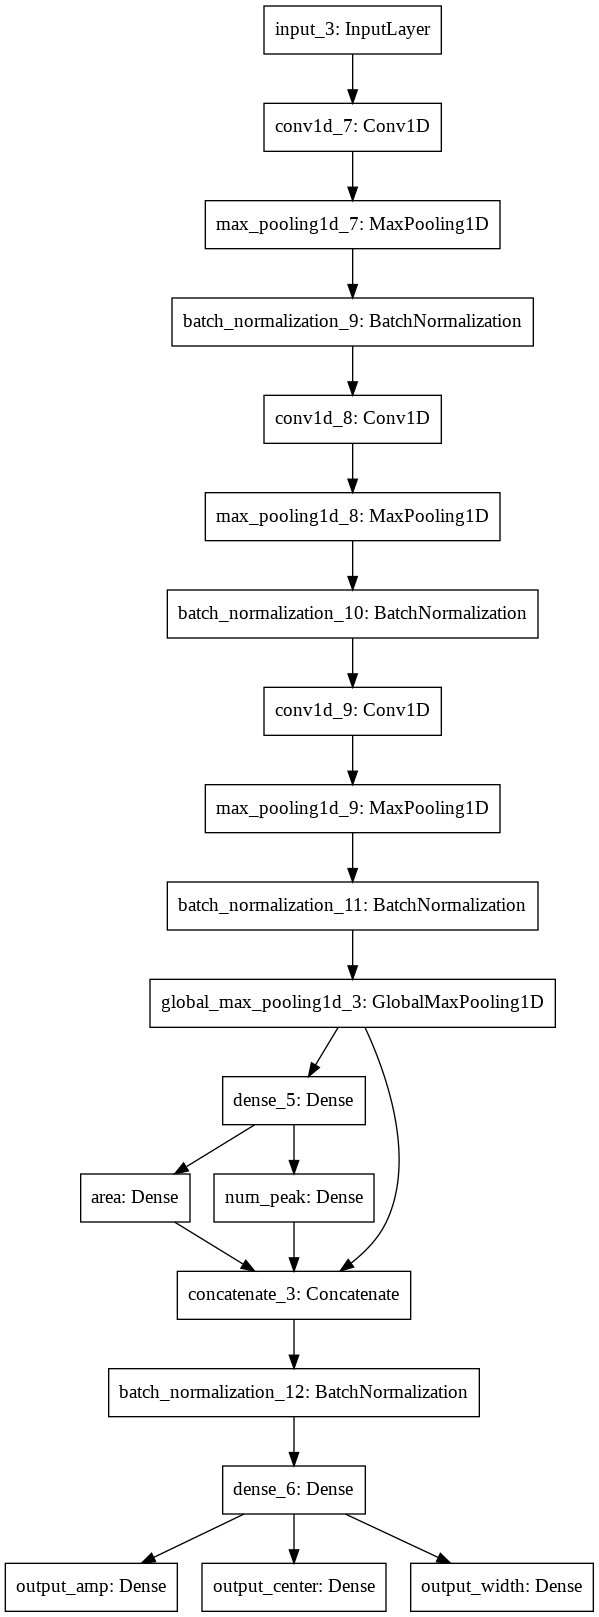

In [15]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate

# input layer
main_inputs = Input(shape = (len(x), 1))

# At least three Convolution layer is needed => other paper
# Adding BatchNormalization layer => we expect the effect of regularization
x_conv1 = Conv1D(64, kernel_size = 100, activation = 'relu')(main_inputs)
x_pooling1 = MaxPooling1D(pool_size = 2)(x_conv1)
x_batch1 = BatchNormalization()(x_pooling1)

x_conv2 = Conv1D(32, kernel_size = 50, activation = 'relu')(x_batch1)
x_pooling2 = MaxPooling1D(pool_size = 2)(x_conv2)
x_batch2 = BatchNormalization()(x_pooling2)

x_conv3 = Conv1D(16, kernel_size = 25, activation = 'relu')(x_batch2)
x_pooling3 = MaxPooling1D(pool_size = 2)(x_conv3)
x_batch3 = BatchNormalization()(x_pooling3)


x_GMpooling = GlobalMaxPooling1D()(x_batch3)
x_dense = Dense(100, activation = 'relu')(x_GMpooling)


output_area = Dense(1, activation = 'linear', name = 'area')(x_dense)
output_num_peak = Dense(1, activation = 'linear', name = 'num_peak')(x_dense)


# merging features into one layer
merge = concatenate([output_area, output_num_peak, x_GMpooling])
merge2 = BatchNormalization()(merge)

hidden1 = Dense(100, activation = 'relu')(merge2)


# prediction output
output_amp = Dense(5, activation = 'linear', name = 'output_amp')(hidden1)
output_center = Dense(5, activation = 'linear', name = 'output_center')(hidden1)
output_width = Dense(5, activation = 'linear', name = 'output_width')(hidden1)

# Definition of model with out input, five output
model = Model(inputs = main_inputs,
              outputs = [output_area, output_num_peak,
                         output_amp, output_center, output_width])

# Summarize layers
print(model.summary())

# plot graph
plot_model(model)

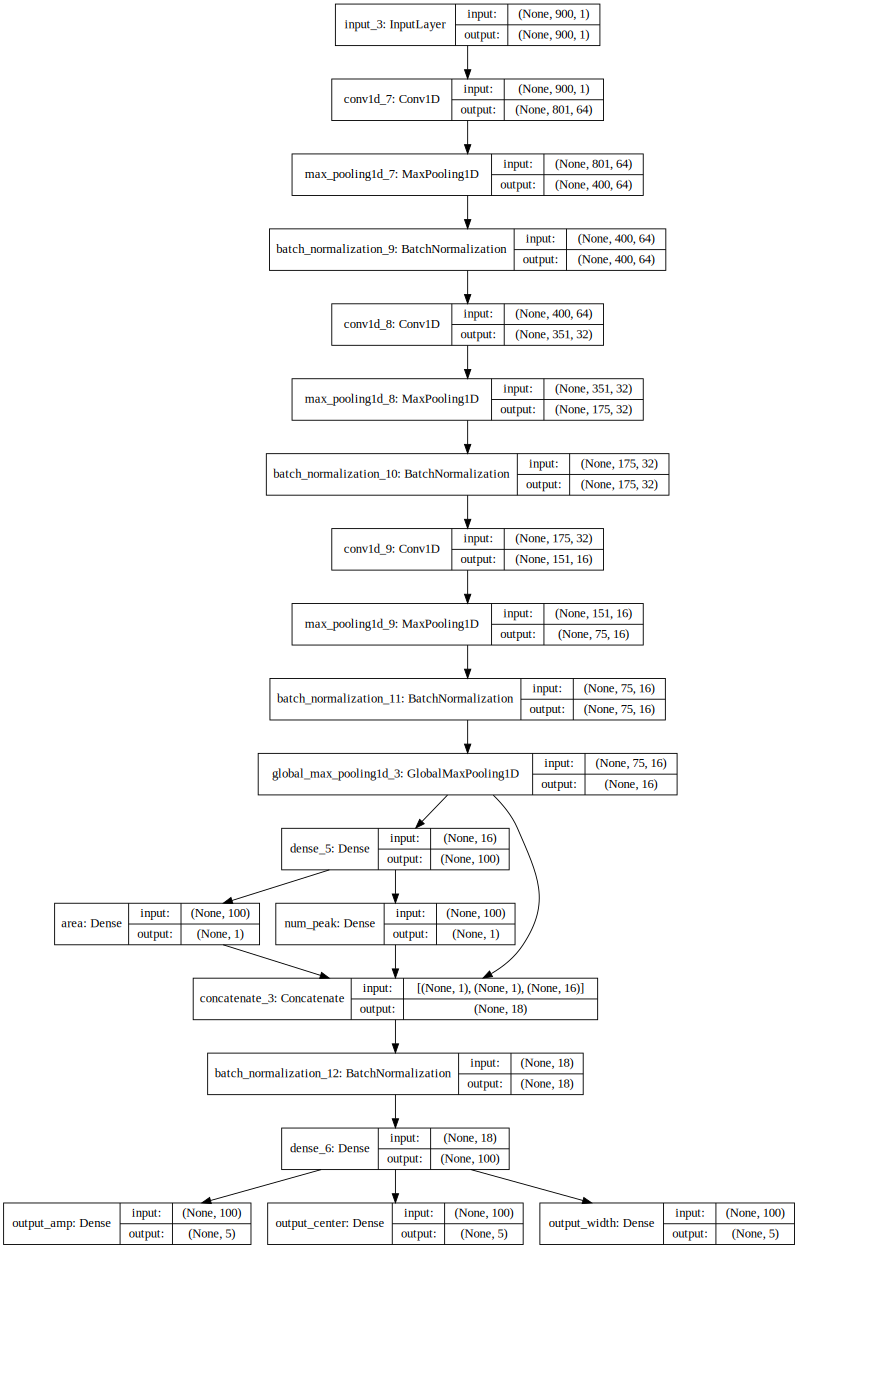

In [16]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes = True, expand_nested = True,
                 dpi = 65).create(prog = 'dot', format = 'svg'))


In [17]:
model.compile(loss = ['mse', 'mse', 'mse', 'mse', 'mse'],
              metrics = ['mae'], 
              optimizer = 'adam')


In [19]:
%%time
hist = model.fit(train_graph, [train_area, train_num_peak, train_amp, train_center, train_width],
                 epochs = 50,
                 batch_size = 4000,
                 validation_data = (val_graph, 
                                    [val_area, val_num_peak, val_amp, val_center, val_width]),
                 verbose = 2)



Train on 200000 samples, validate on 50000 samples
Epoch 1/50
 - 26s - loss: 574701.1400 - area_loss: 574688.8125 - num_peak_loss: 3.1426 - output_amp_loss: 4.9673 - output_center_loss: 3.8048 - output_width_loss: 0.3822 - area_mae: 659.2744 - num_peak_mae: 1.4142 - output_amp_mae: 1.8504 - output_center_mae: 1.5468 - output_width_mae: 0.5054 - val_loss: 594383.2950 - val_area_loss: 594578.1250 - val_num_peak_loss: 12.2023 - val_output_amp_loss: 3.6543 - val_output_center_loss: 3.3009 - val_output_width_loss: 0.6409 - val_area_mae: 671.8533 - val_num_peak_mae: 3.1777 - val_output_amp_mae: 1.5451 - val_output_center_mae: 1.4568 - val_output_width_mae: 0.6391
Epoch 2/50
 - 22s - loss: 466414.9556 - area_loss: 466405.4062 - num_peak_loss: 2.6639 - output_amp_loss: 3.4297 - output_center_loss: 3.2101 - output_width_loss: 0.2542 - area_mae: 584.6171 - num_peak_mae: 1.2905 - output_amp_mae: 1.5290 - output_center_mae: 1.3989 - output_width_mae: 0.3986 - val_loss: 586174.4750 - val_area_loss:

In [20]:
for key in hist.history.keys():
    print(key)  # list of every loss function names

val_loss
val_area_loss
val_num_peak_loss
val_output_amp_loss
val_output_center_loss
val_output_width_loss
val_area_mae
val_num_peak_mae
val_output_amp_mae
val_output_center_mae
val_output_width_mae
loss
area_loss
num_peak_loss
output_amp_loss
output_center_loss
output_width_loss
area_mae
num_peak_mae
output_amp_mae
output_center_mae
output_width_mae


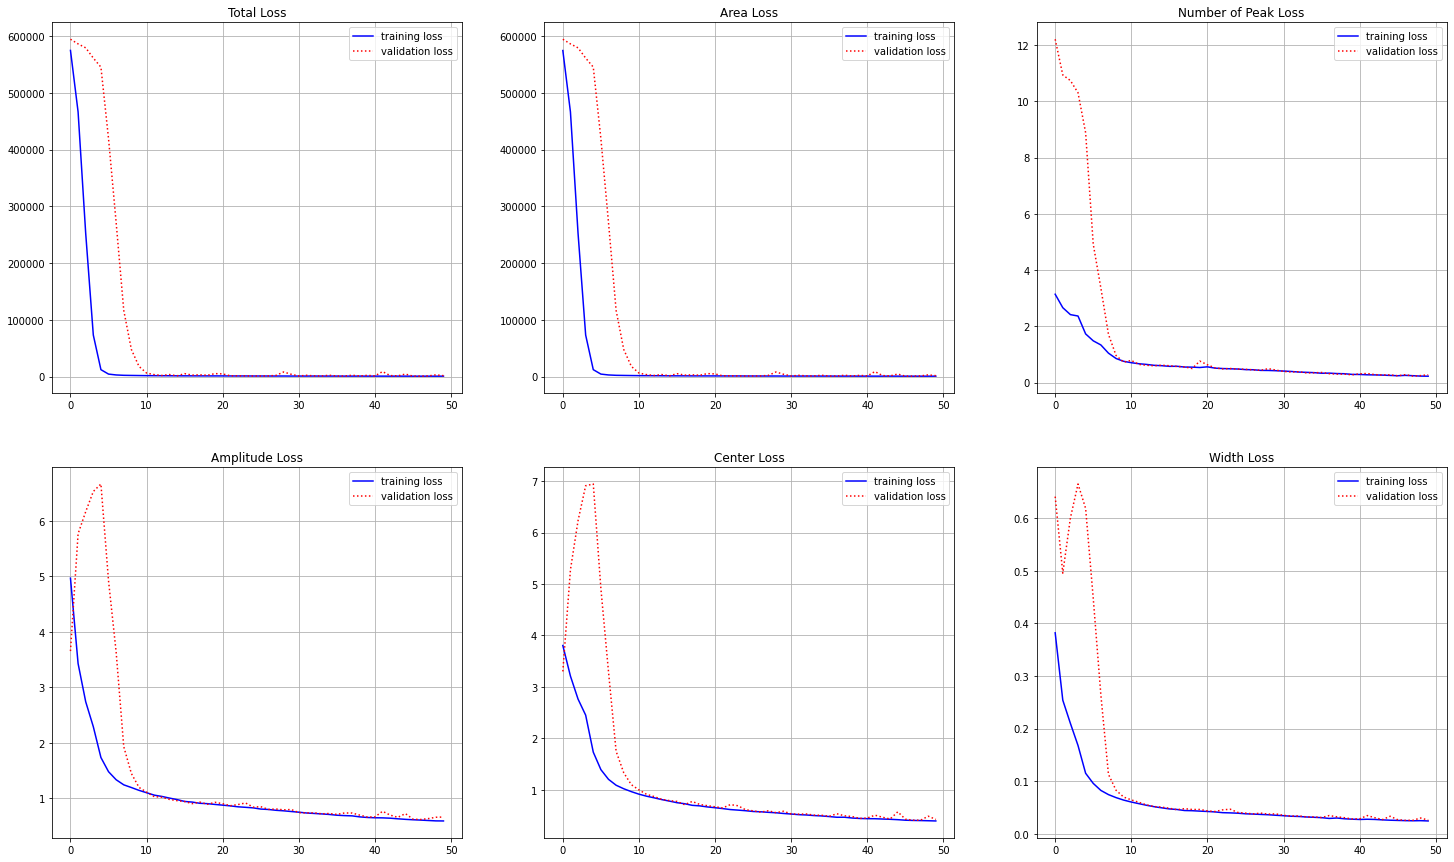

In [23]:
plt.figure(figsize = (25, 15))

plt.subplot(231)
plt.plot(hist.history['loss'], 'b-', label = 'training loss')
plt.plot(hist.history['val_loss'], 'r:', label = 'validation loss')
plt.grid(True)
plt.title("Total Loss")
plt.legend()

plt.subplot(232)
plt.plot(hist.history['area_loss'], 'b-', label = 'training loss')
plt.plot(hist.history['val_area_loss'], 'r:', label = 'validation loss')
plt.grid(True)
plt.title("Area Loss")
plt.legend()

plt.subplot(233)
plt.plot(hist.history['num_peak_loss'], 'b-', label = 'training loss')
plt.plot(hist.history['val_num_peak_loss'], 'r:', label = 'validation loss')
plt.grid(True)
plt.title("Number of Peak Loss")
plt.legend()

plt.subplot(234)
plt.plot(hist.history['output_amp_loss'], 'b-', label = 'training loss')
plt.plot(hist.history['val_output_amp_loss'], 'r:', label = 'validation loss')
plt.grid(True)
plt.title("Amplitude Loss")
plt.legend()

plt.subplot(235)
plt.plot(hist.history['output_center_loss'], 'b-', label = 'training loss')
plt.plot(hist.history['val_output_center_loss'], 'r:', label = 'validation loss')
plt.grid(True)
plt.title("Center Loss")
plt.legend()

plt.subplot(236)
plt.plot(hist.history['output_width_loss'], 'b-', label = 'training loss')
plt.plot(hist.history['val_output_width_loss'], 'r:', label = 'validation loss')
plt.grid(True)
plt.title("Width Loss")
plt.legend()

In [24]:
print(test_graph.shape)

(50000, 900, 1)


In [25]:
prediction = model.predict(test_graph)
print(len(prediction))

5


In [26]:
print(prediction[0].shape)  # area
print(prediction[1].shape)  # num_peak
print(prediction[2].shape)  # amplitude
print(prediction[3].shape)  # center
print(prediction[4].shape) # width

(50000, 1)
(50000, 1)
(50000, 5)
(50000, 5)
(50000, 5)


In [27]:
for i in range(10):
    print("Predicted area:", prediction[0][i])
    print("True area:", test_area[i])

    print("Predicted num_peak:", prediction[1][i])
    print("True num_peak:", test_num_peak[i])

    print("Predicted amplitude:", prediction[2][i])
    print("True amplitude:", test_amp[i])

    print("Predicted center:", prediction[3][i])
    print("True center:", test_center[i])

    print("Predicted width:", prediction[4][i])
    print("True width:", test_width[i])
    print('======================================================================')

Predicted area: [1082.063]
True area: 1030.079112170729
Predicted num_peak: [4.189343]
True num_peak: 4
Predicted amplitude: [3.0904667 2.2460382 2.8365748 3.4196174 1.6620438]
True amplitude: [ 3.62546327  2.30659611  3.74825532  2.61882202 -1.        ]
Predicted center: [0.9422879 1.8669294 2.9382644 4.034772  2.2542002]
True center: [ 0.85286101  1.92789559  3.19202378  4.1630599  -1.        ]
Predicted width: [ 0.22919905  0.1653643   0.331628    0.32421893 -0.35868925]
True width: [ 0.19312873  0.2048982   0.35484413  0.35691729 -1.        ]
Predicted area: [967.8373]
True area: 946.1506060171757
Predicted num_peak: [4.738672]
True num_peak: 5
Predicted amplitude: [2.7212832 2.8550482 3.2778924 3.1903965 1.342469 ]
True amplitude: [2.81484571 3.34096769 3.05133878 4.59345668 1.81588491]
Predicted center: [1.0764201 1.9534909 2.8253107 4.1516976 2.8820517]
True center: [0.84651271 2.18272172 3.03157496 3.83800206 4.87549241]
Predicted width: [ 0.25689632  0.23728245  0.3469074   0.

## 3. Visualization of the Result

In [ ]:
for i in range(10):

    if test_num_peak[i] == 5:
        plt.plot(Lorentzian(x, *))